In [71]:
import json
import statistics

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
def CreateJsonEntry(file_path):
    file_path1 = './20240105/log_ea30528f8f8971a62700286f30ee0a_client.qlog'
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Add commas between lines
    json_str = ",".join(lines)
    # Surround the entire string with square brackets to create a JSON array
    json_str = "[" + json_str + "]"
    # Load the JSON array
    json_entry = json.loads(json_str)
    
    return json_entry

def GetRttList(json_entry, first_rtt_set_time):
    latest_rtt_list = []
    for entry in json_entry:
        # Check if the entry has a 'time' field and its value is after 103
        if 'time' in entry and entry['time'] > first_rtt_set_time:
            # Check if the entry has 'name' field and it is "recovery:metrics_updated"
            if 'name' in entry and entry['name'] == 'recovery:metrics_updated':
                data = entry.get('data', {})
                latest_rtt = data.get('latest_rtt')
                
                if latest_rtt is not None:
                    latest_rtt_list.append(latest_rtt)
                    # Print the time and corresponding latest_rtt
                    # print(f"Time: {entry['time']}, Latest RTT: {latest_rtt}")

    return latest_rtt_list

In [60]:
# Open the .qlog file for reading
file_path_wifi = './20240105/log_ea30528f8f8971a62700286f30ee0a_client.qlog'
json_entry_wifi = CreateJsonEntry(file_path_wifi)
latest_rtt_list_wifi = GetRttList(json_entry_wifi, 110)

In [61]:
# Open the .qlog file for reading
file_path_4G_CHT = './20240105_4G_CHT/log_f5134b8b2aafbf5b_client.qlog'
json_entry_4G_CHT = CreateJsonEntry(file_path_4G_CHT)
latest_rtt_list_4G_CHT = GetRttList(json_entry_4G_CHT, 70)

In [62]:
# Open the .qlog file for reading
file_path4G_TM = './20240105_4G_TM/log_d760c725e7a29a1935fefbf9b5a89d35d4adb0cc_client.qlog'
json_entry_4G_TM = CreateJsonEntry(file_path4G_TM)
latest_rtt_list_4G_TM = GetRttList(json_entry_4G_TM, 110)

In [73]:
# Open the .qlog file for reading
file_path_5G_CHT = './20240105_5G_CHT/log_4f9f643375a62b4b0511693923a6ed47_client.qlog'
json_entry_5G_CHT = CreateJsonEntry(file_path_5G_CHT)
latest_rtt_list_5G_CHT = GetRttList(json_entry_5G_CHT, 47)

In [74]:
# check the number of latest_rtt_list
print(len(latest_rtt_list_wifi))
print(len(latest_rtt_list_4G_CHT))
print(len(latest_rtt_list_4G_TM))
print(len(latest_rtt_list_5G_CHT))

120
120
120
120


In [75]:
# 單位：ms
def PrintStats(rtt_list):
    stdev = statistics.stdev(rtt_list)
    mean = statistics.mean(rtt_list)
    median = statistics.median(rtt_list)
    print("standard deviation:", stdev)
    print("mean:", mean)
    print("median:", median)

print("wifi: ")
PrintStats(latest_rtt_list_wifi)
print("4G_CHT: ")
PrintStats(latest_rtt_list_4G_CHT)
print("4G_TM: ")
PrintStats(latest_rtt_list_4G_TM)
print("5G_CHT: ")
PrintStats(latest_rtt_list_5G_CHT)

wifi: 
standard deviation: 5.276751068816724
mean: 20.347036866666667
median: 19.9138335
4G_CHT: 
standard deviation: 139.09793549955413
mean: 105.87732565833333
median: 82.177458
4G_TM: 
standard deviation: 12.93212013884221
mean: 70.214542375
median: 67.82724999999999
5G_CHT: 
standard deviation: 28.71907226826704
mean: 67.73820976666667
median: 60.869749999999996


In [76]:
q1_list = []
q3_list = []
iqr_list = []
lower_list = []
higher_list = []

def GetIqr(rtt_list):
    q1, q3 = np.percentile(rtt_list, [25, 75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5*iqr)
    higher_fence = q3 + (1.5*iqr)

    q1_list.append(q1)
    q3_list.append(q3)
    iqr_list.append(iqr)
    lower_list.append(lower_fence)
    higher_list.append(higher_fence)


GetIqr(latest_rtt_list_wifi)
GetIqr(latest_rtt_list_4G_CHT)
GetIqr(latest_rtt_list_4G_TM)
GetIqr(latest_rtt_list_5G_CHT)

for i in range(4):
    if i == 0:
        print("wifi: ")
    if i == 1:
        print("4G_CHT: ") 
    if i == 2:
        print("4G_TM: ") 
    if i == 3:
        print("5G_CHT: ")
    print("q1:", q1_list[i], ", q3:", q3_list[i], ", iqr:", iqr_list[i], ", lower_fence:", lower_list[i], ", higher_fence:", higher_list[i])

wifi: 
q1: 16.755426749999998 , q3: 23.7615205 , iqr: 7.006093750000002 , lower_fence: 6.246286124999996 , higher_fence: 34.270661125000004
4G_CHT: 
q1: 76.360198 , q3: 88.65483325 , iqr: 12.294635249999999 , lower_fence: 57.918245125 , higher_fence: 107.096786125
4G_TM: 
q1: 62.19269825 , q3: 75.236052 , iqr: 13.043353750000001 , lower_fence: 42.627667625 , higher_fence: 94.801082625
5G_CHT: 
q1: 52.795333 , q3: 77.94991675 , iqr: 25.15458375 , lower_fence: 15.063457374999999 , higher_fence: 115.681792375


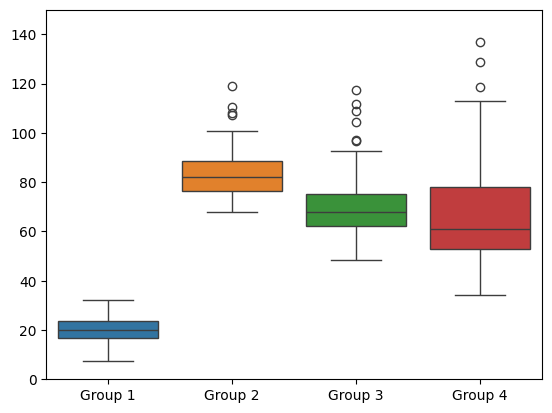

In [84]:
# Assuming latest_rtt_list1, latest_rtt_list2, latest_rtt_list3, and latest_rtt_list4 are your lists
data = {'Group 1': latest_rtt_list_wifi,
        'Group 2': latest_rtt_list_4G_CHT,
        'Group 3': latest_rtt_list_4G_TM,
        'Group 4': latest_rtt_list_5G_CHT}

df = pd.DataFrame(data)

# Create a boxplot
sns.boxplot(data=df)

# Set a custom y-axis limit
plt.ylim(0, 150)  # Adjust the limits based on your data
plt.show()

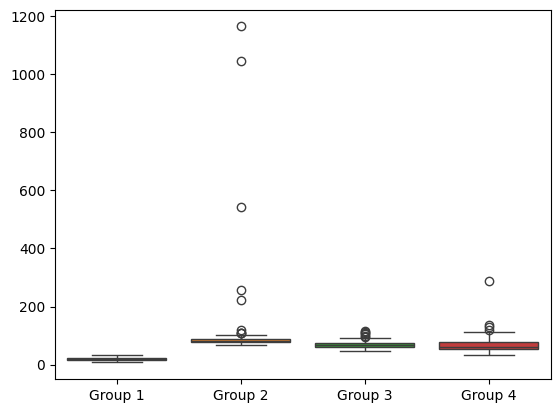

In [85]:
# Assuming latest_rtt_list1, latest_rtt_list2, latest_rtt_list3, and latest_rtt_list4 are your lists
data = {'Group 1': latest_rtt_list_wifi,
        'Group 2': latest_rtt_list_4G_CHT,
        'Group 3': latest_rtt_list_4G_TM,
        'Group 4': latest_rtt_list_5G_CHT}

df = pd.DataFrame(data)

# Create a boxplot
sns.boxplot(data=df)
plt.show()